In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randint


In [2]:

def find_max(R, i, j):
 max_point = 0
 
 for k in [-1, 0, 1]:
     for l in [-1, 0, 1]:
         if (max_point < R[i+k][j+l]):
             max_point = R[i+k][j+l]
 return max_point


In [3]:

def matrix_multiply(I_x, I_y):
 (h, w) = I_x.shape
 result = np.empty((h, w))
 
 for i in range(0, h):
     for j in range(0, w):
         result[i][j] = I_x[i][j] * I_y[i][j]

 return result


In [4]:

def nonmax_suppression(R, i, j, max_point):
 for k in [-1, 0, 1]:
     for l in [-1, 0, 1]:
         if (R[i+k][j+l] == max_point):
             continue
         else:
             R[i+k][j+l] = 0


In [5]:

def calculate_trace(A, B):
 return A + B


In [6]:

def calculate_det(A, B, C):
 det = matrix_multiply(A, B) - matrix_multiply(C, C)
 
 return det

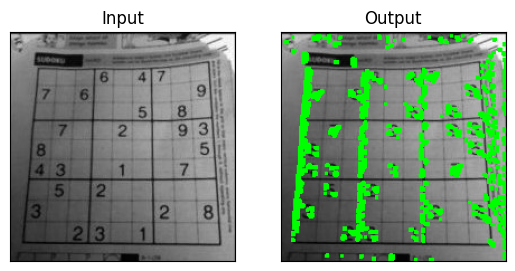

In [31]:
imm = ['dave.jpg']
ppp = 0
for so in imm:
    img = cv2.imread(so)
    plt.subplot(1, 2, ppp*2+1)
    plt.imshow(img, cmap='gray')
    plt.title('Input')
    plt.xticks([])
    plt.yticks([])
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    gaussian_blur = cv2.GaussianBlur(gray, (3, 3), 0)

    I_X = cv2.Sobel(gaussian_blur, cv2.CV_64F, 1, 0, ksize=3)
    I_Y = cv2.Sobel(gaussian_blur, cv2.CV_64F, 0, 1, ksize=3)

    A = matrix_multiply(I_X, I_X)
    B = matrix_multiply(I_X, I_Y)
    C = matrix_multiply(I_Y, I_Y)

    _A = cv2.GaussianBlur(A, (3, 3), 0)
    _B = cv2.GaussianBlur(B, (3, 3), 0)
    _C = cv2.GaussianBlur(C, (3, 3), 0)

    K = 0.04

    R = calculate_det(_A, _B, _C) - K*calculate_trace(_A, _B)
    _, R = cv2.threshold(R, R.max() // 500, R.max(), cv2.THRESH_BINARY)

    (h, w) = R.shape
    for i in range(1, h - 1, 2):
        for j in range(1, w - 1, 2):
            max_pixel = find_max(R, i, j)
            nonmax_suppression(R, i, j, max_pixel)

    R_dst=cv2.dilate(R,None)
    img[R_dst > 0.001*R_dst.max()] = (0, 255, 0)
    
    
    # print(ppp*2+1, ppp*2+2)
    plt.subplot(1, 2, ppp*2+2)
    plt.imshow(img, cmap='gray')
    plt.title('Output')
    plt.xticks([])
    plt.yticks([])
    ppp += 1

  

In [8]:
PHAT HIEN VUNG VO KHUAN 
đánh giá các phương pháp phân vùng cho ảnh y tế
Công cụ gán nhãn dữ liệu: cvat.ai


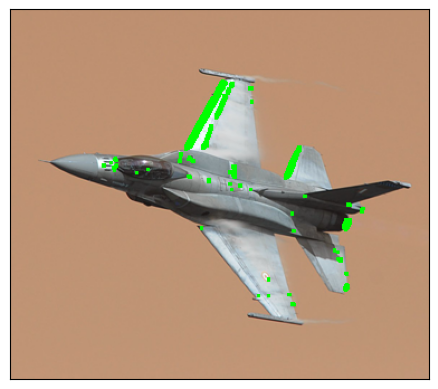